In [2]:
from scipy.interpolate import make_interp_spline

import pandas as pd
import glob
from utils import convert_csv_to_graph
from network import get_network_stats
import networkx as nx
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from utils import smooth
from data import get_MIM_df

In [3]:
sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text

# Make baseline comparisons

In [4]:
mim1_mdf, mim1_adf = get_MIM_df('1_w=25')
mim2_mdf, mim2_adf = get_MIM_df('2_w=25')
mim3_mdf, mim3_adf = get_MIM_df('3_w=25')

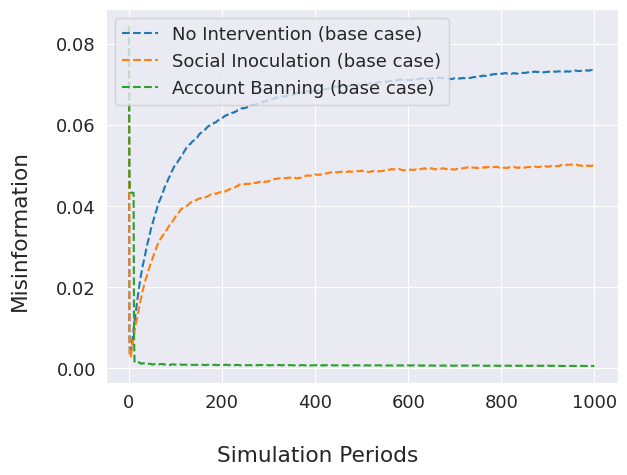

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)

x = np.linspace(0, 1000, 1000)

mim1_y = mim1_mdf['misinformation']
mim2_y = mim2_mdf['misinformation']
mim3_y = mim3_mdf['misinformation']

ax.plot(x, smooth(mim1_y, 0.0), '--', label='No Intervention (base case)')
ax.plot(x, smooth(mim3_y, 0.0),'--', label='Social Inoculation (base case)')
ax.plot(x, smooth(mim2_y, 0.0),'--', label='Account Banning (base case)')



ax.legend(loc='best')

fig.supylabel('Misinformation')
fig.supxlabel('Simulation Periods')

# ax.set_title('Misinformation changes under \n different intervention methods')

plt.tight_layout()
plt.savefig('data/graphs/exp0_misinf_line.png', dpi=500)


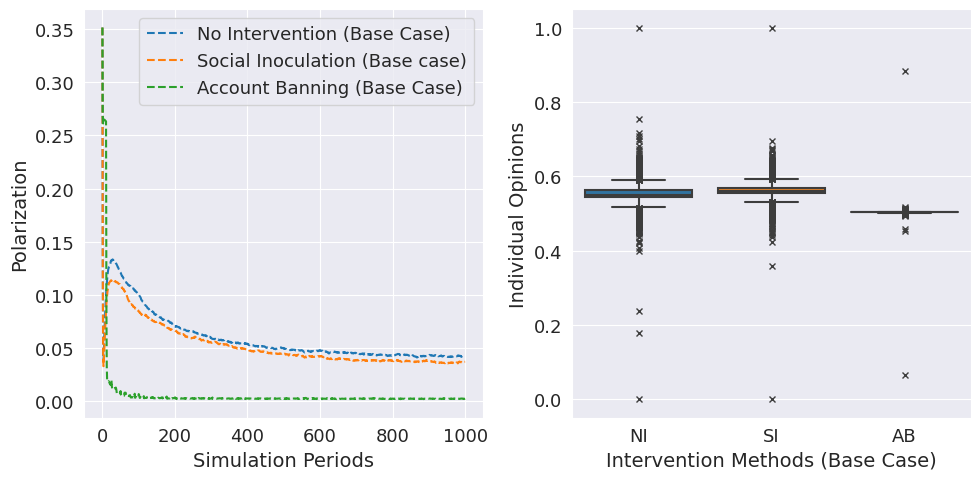

In [6]:
#---------------------------------------------------------------------------
#                            Polarization (Line Plot)
#---------------------------------------------------------------------------


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

x = np.linspace(0, 1000, 1000)

mim1_y = mim1_mdf['polarization']
mim2_y = mim2_mdf['polarization']
mim3_y = mim3_mdf['polarization']

axes[0].plot(x, smooth(mim1_y, 0.0), '--', label='No Intervention (Base Case)')

axes[0].plot(x, smooth(mim3_y, 0.0), '--',
             label='Social Inoculation (Base case)')

axes[0].plot(x, smooth(mim2_y, 0.0), '--', label='Account Banning (Base Case)')



axes[0].legend(loc='best')

axes[0].set_ylabel('Polarization')
axes[0].set_xlabel('Simulation Periods')


#---------------------------------------------------------------------------
#                            Opinion (Box Plot)
#---------------------------------------------------------------------------

# we need to get a distribution of agent opinions of each experiment
# by working out the average long-run opinion of each agent across 10 experiments

# TODO: we need to find out the average of agentdf during the last 200 iterations

# We establish the x-axis as w, y axis
# as the distributions of average opinions over the last 200 iterations

num_agent = 1069


labels = ['NI', 'SI', 'AB']

# labels = [1, 2, 3]

# TODO: concatenate rows

mim1_y = mim1_adf['opinion'][-num_agent:]
mim2_y = mim2_adf['opinion'][-num_agent:]
mim3_y = mim3_adf['opinion'][-num_agent:]

x = sum([[l] * num_agent for l in labels], [])


combined_y = list(pd.concat([mim1_y, mim3_y, mim2_y],
                  axis=0, ignore_index=True, sort=False))

# axes[0].set_ylim(0.4, 0.6)
# axes[1].set_ylim(0.4, 0.6)
# axes[2].set_ylim(0.4, 0.6)

sns.boxplot(x=x, y=combined_y, ax=axes[1], flierprops={
            'marker': 'x', },)


# l = axes[1].get_xlabel()
# axes[1].set_ylabel(l, fontsize=5)


axes[1].set_ylabel('Individual Opinions')
axes[1].set_xlabel('Intervention Methods (Base Case)')
plt.tight_layout()


plt.savefig('data/graphs/exp2_op_box.png', dpi=500)


# ax.set_title('Misinformation changes under \n different intervention methods')

plt.savefig('data/graphs/exp0_pol_op_combined.png', dpi=500)
